### Changes
Uses model.train_on_batch() instead of GradientTape.
For the action that is being trained, uses standard target; for the 
other four actions, uses the current network's predictions as targets
to negate any loss.

In [1]:
# Import packages.
import tensorflow as tf             # Tensorflow.
import numpy as np                  # I chose NumPy instead of Pandas because it uses less RAM
import matplotlib.pyplot as plt     # Plotting statistics.
import time

from MLSnake import Game_2 as snake
from MLSnake import Agent_5 as agent
from MLSnake import config as cfg

print(tf.__version__)
# This code allows for the GPU to be utilized properly.
tf.autograph.set_verbosity(0)
physical_devices = tf.config.list_physical_devices("GPU")
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

print(physical_devices)

2.7.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
def plot(data, x, y):
    '''Plot statistics.'''
    
    print(y + " v. " + x)
    plt.plot(data)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    print()

Model: "DQN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 8)          736       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 4, 4)          4640      
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 71,685
Trainable params: 71,685
Non-trainable params: 0
_________________________________________________________________
Model: "DQN2"
____________________________________________

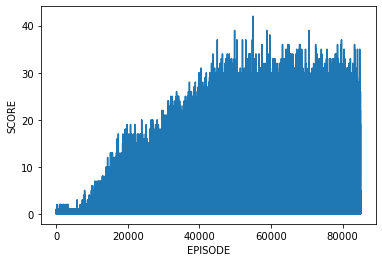


LOSS v. FRAME


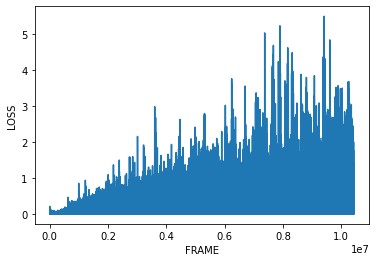

TclError: invalid command name ".!canvas"

In [3]:
game = snake.game()
snake_agent = agent.agent(game)
x = 0

while True:
    snake_agent.start()

    if x % cfg.autosave_period == 0:
        print()

        print("SAVING IN 5 SECONDS")
        time.sleep(5)
        snake_agent.save_all(cfg.save_path)

        print("BACKING UP IN 5 SECONDS")
        time.sleep(5)
        snake_agent.save_all(cfg.backup_path)

        print("Frames played: " + str(snake_agent.train_data["frames_played"]))
        print("Average score: " + str(sum(snake_agent.stats["score"]) / len(snake_agent.stats["score"])))
        print(f"Average score (Last {cfg.autosave_period} episodes): " + str(sum(snake_agent.stats["score"][-cfg.autosave_period:]) / cfg.autosave_period))
        print("Average loss: " + str(sum(snake_agent.stats["loss"]) / len(snake_agent.stats["loss"])))
        print("Average Q Value: " + str(sum(snake_agent.stats["testing"]) / len(snake_agent.stats["testing"])))

        plot(snake_agent.stats["score"], "EPISODE", "SCORE")
        plot(snake_agent.stats["loss"], "FRAME", "LOSS")
        # plot(snake_agent.stats["testing"], "EPISODE", "Q VALUE FOR TEST STATE")

        print()
        print()
    x += 1